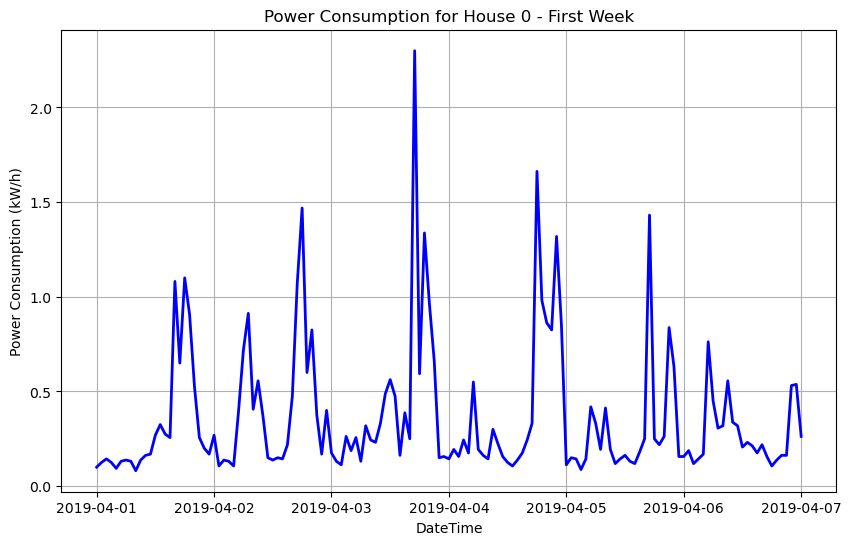

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Read your CSV file, setting low_memory=False to avoid the warning
df = pd.read_csv('Gabriel.csv', low_memory=False)

# Convert DateTime1 to datetime format
df['DateTime1'] = pd.to_datetime(df['DateTime1'])

# Filter data for the first week (assuming your data starts on 2019-04-01)
start_date = pd.to_datetime('2019-04-01')
end_date = start_date + pd.DateOffset(days=6)
df_week = df[(df['DateTime1'] >= start_date) & (df['DateTime1'] <= end_date)]

# Select the house you want (let's say the first house, adjust column name as needed)
house_number = 0  # Change if you want a different house
consumption_column = df.columns[house_number + 7]  # Assuming 5 columns before consumption data starts

# Prepare data for plotting (with the fix)
x = df_week['DateTime1'].astype('int64') // 10**9  # Convert to int64 first, then to int32
y = df_week[consumption_column]

# Create a smooth curve using spline interpolation
spline = make_interp_spline(x, y, k=3)  # Adjust 'k' for smoothness

# Generate smooth x values (with the fix)
x_smooth = pd.date_range(start_date, end_date, freq='H').astype('int64') // 10**9
y_smooth = spline(x_smooth)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(x_smooth, unit='s'), y_smooth, color='blue', linewidth=2)
plt.xlabel('DateTime')
plt.ylabel('Power Consumption (kW/h)')
plt.title(f'Power Consumption for House {house_number} - First Week')
plt.grid(True)
plt.show()

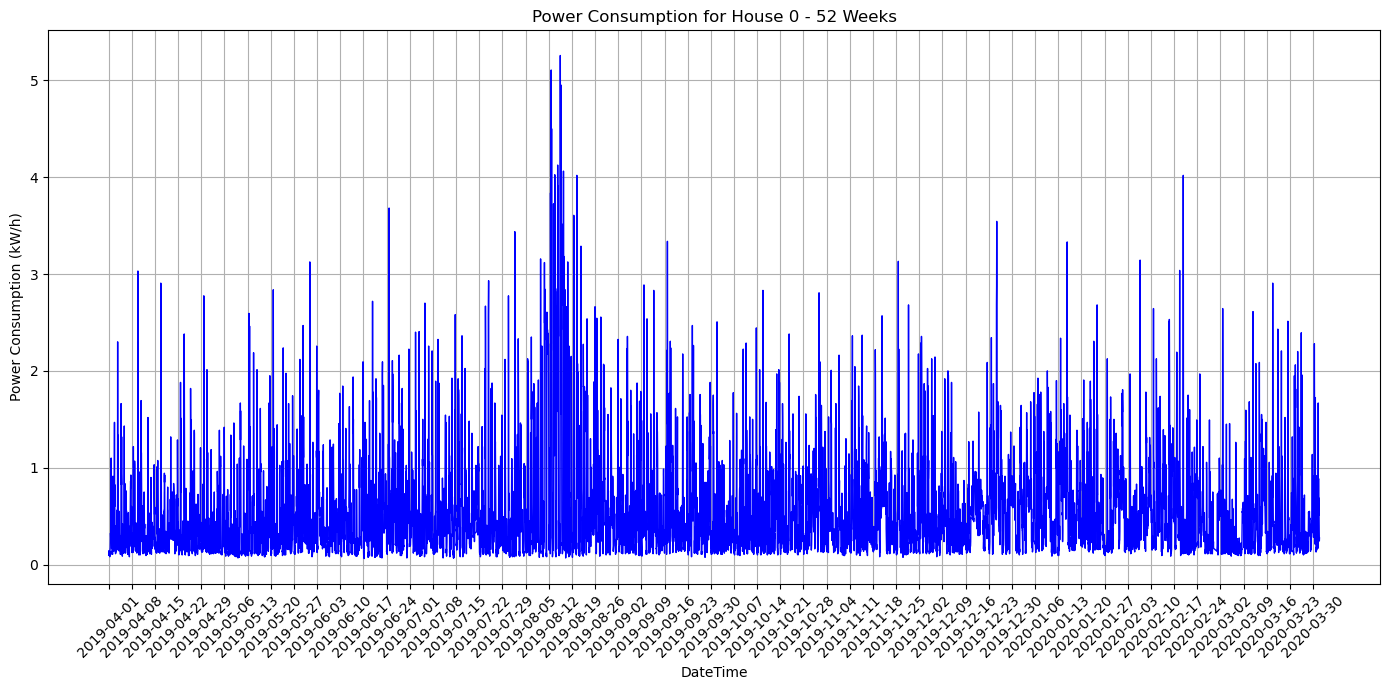

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read your CSV file, setting low_memory=False to avoid the warning
df = pd.read_csv('Gabriel.csv', low_memory=False)

# Convert DateTime1 to datetime format
df['DateTime1'] = pd.to_datetime(df['DateTime1'])

# Select the first house (adjust column name as needed)
house_number = 0  # Change if you want a different house
consumption_column = df.columns[house_number + 7]  # Assuming 5 columns before consumption data starts

# Prepare data for plotting
x = df['DateTime1']
y = df[consumption_column]

# Plot
plt.figure(figsize=(14, 7))  # Adjust figure size as needed
plt.plot(x, y, color='blue', linewidth=1)  # You might want to adjust linewidth for better visibility
plt.xlabel('DateTime')
plt.ylabel('Power Consumption (kW/h)')
plt.title(f'Power Consumption for House {house_number} - 52 Weeks')
plt.grid(True)
plt.xticks(pd.date_range(x.min(), x.max(), freq='W-MON'), rotation=45)  # Show weekly labels
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

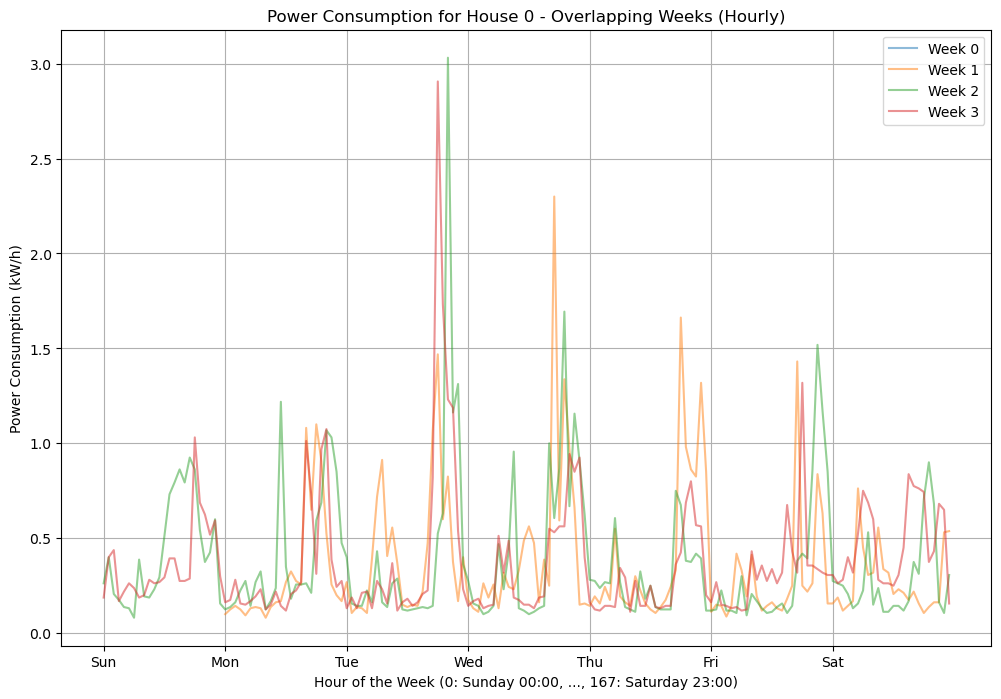

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Read your CSV file, setting low_memory=False to avoid the warning
df = pd.read_csv('Gabriel.csv', low_memory=False)

# Convert DateTime1 to datetime format
df['DateTime1'] = pd.to_datetime(df['DateTime1'])

# Select the house you want (let's say the first house, adjust column name as needed)
house_number = 0
consumption_column = df.columns[house_number + 7]

# Weeks to plot (modify this list as needed)
weeks_to_plot = range(0, 4)  # Example: Plot the first three weeks

# Plot
plt.figure(figsize=(12, 8))

for week_num in weeks_to_plot:
    # Filter data for the current week and create a copy
    df_week = df[df['Week'] == week_num].copy() 

    # Prepare data for plotting - Current Week
    # Combine 'Day' and hour to create a continuous x-axis representing the entire week
    df_week.loc[:, 'HourOfWeek'] = (df_week['Day'] - 1) * 24 + df_week['DateTime1'].dt.hour
    x = df_week['HourOfWeek']
    y = df_week[consumption_column]

    # Plot the current week
    plt.plot(x, y, alpha=0.5, label=f'Week {week_num}')

plt.xlabel('Hour of the Week (0: Sunday 00:00, ..., 167: Saturday 23:00)')
plt.ylabel('Power Consumption (kW/h)')
plt.title(f'Power Consumption for House {house_number} - Overlapping Weeks (Hourly)')
plt.xticks(range(0, 168, 24), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.grid(True)
plt.legend()
plt.show()

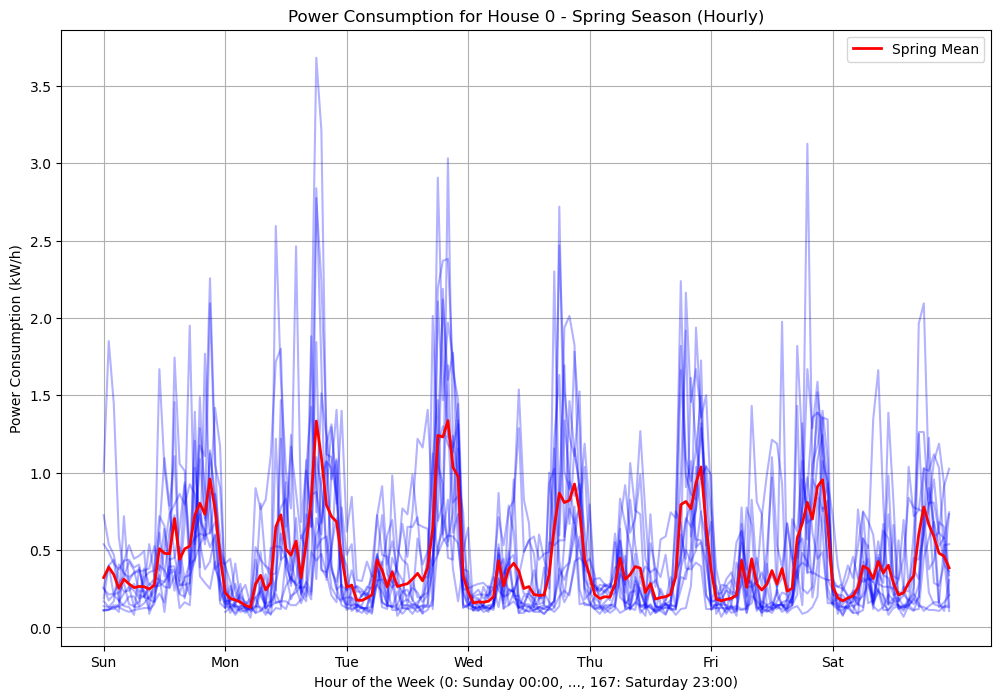

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read your CSV file, setting low_memory=False to avoid the warning
df = pd.read_csv('Gabriel.csv', low_memory=False)

# Convert DateTime1 to datetime format
df['DateTime1'] = pd.to_datetime(df['DateTime1'])

# Select the house you want 
house_number = 0
consumption_column = df.columns[house_number + 7]

# Filter data for the Spring season (first 13 weeks)
df_spring = df[df['Week'].isin(range(1, 14))] 

# Calculate the mean hourly consumption for the Spring season
df_spring_mean = df_spring.groupby(['Day', df_spring['DateTime1'].dt.hour])[consumption_column].mean().reset_index()

# Prepare data for plotting - Spring Mean
df_spring_mean['HourOfWeek'] = (df_spring_mean['Day'] - 1) * 24 + df_spring_mean['DateTime1']
x_mean = df_spring_mean['HourOfWeek']
y_mean = df_spring_mean[consumption_column]

# Weeks to plot 
weeks_to_plot = range(1, 14)

# Plot
plt.figure(figsize=(12, 8))

# Plot individual weeks
for week_num in weeks_to_plot:
    # Filter data for the current week and create a copy
    df_week = df[df['Week'] == week_num].copy() 

    # Prepare data for plotting - Current Week
    df_week.loc[:, 'HourOfWeek'] = (df_week['Day'] - 1) * 24 + df_week['DateTime1'].dt.hour
    x = df_week['HourOfWeek']
    y = df_week[consumption_column]

    plt.plot(x, y, alpha=0.3, color='blue')  # All weeks in the same color with transparency

# Plot the Spring mean
plt.plot(x_mean, y_mean, color='red', linewidth=2, label='Spring Mean')

plt.xlabel('Hour of the Week (0: Sunday 00:00, ..., 167: Saturday 23:00)')
plt.ylabel('Power Consumption (kW/h)')
plt.title(f'Power Consumption for House {house_number} - Spring Season (Hourly)')
plt.xticks(range(0, 168, 24), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.grid(True)
plt.legend()
plt.show()

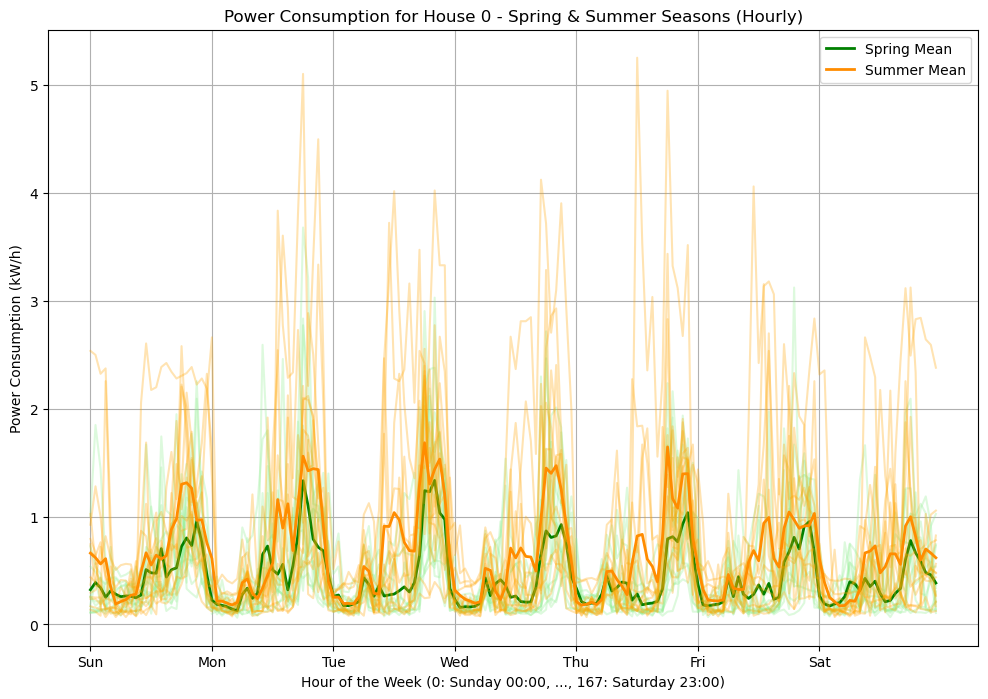

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Read your CSV file, setting low_memory=False to avoid the warning
df = pd.read_csv('Gabriel.csv', low_memory=False)

# Convert DateTime1 to datetime format
df['DateTime1'] = pd.to_datetime(df['DateTime1'])

# Select the house you want 
house_number = 0
consumption_column = df.columns[house_number + 7]

# Filter data for the Spring season (first 13 weeks)
df_spring = df[df['Week'].isin(range(1, 14))]

# Filter data for the Summer season (next 13 weeks)
df_summer = df[df['Week'].isin(range(14, 27))] 

# Calculate the mean hourly consumption for each season
df_spring_mean = df_spring.groupby(['Day', df_spring['DateTime1'].dt.hour])[consumption_column].mean().reset_index()
df_summer_mean = df_summer.groupby(['Day', df_summer['DateTime1'].dt.hour])[consumption_column].mean().reset_index()

# Prepare data for plotting - Spring & Summer Means
df_spring_mean['HourOfWeek'] = (df_spring_mean['Day'] - 1) * 24 + df_spring_mean['DateTime1']
df_summer_mean['HourOfWeek'] = (df_summer_mean['Day'] - 1) * 24 + df_summer_mean['DateTime1']

# Plot
plt.figure(figsize=(12, 8))

# Plot individual weeks for Spring
for week_num in range(1, 14):
    df_week = df[df['Week'] == week_num].copy() 
    df_week.loc[:, 'HourOfWeek'] = (df_week['Day'] - 1) * 24 + df_week['DateTime1'].dt.hour
    plt.plot(df_week['HourOfWeek'], df_week[consumption_column], alpha=0.3, color='lightgreen')

# Plot Spring mean
plt.plot(df_spring_mean['HourOfWeek'], df_spring_mean[consumption_column], color='green', linewidth=2, label='Spring Mean')

# Plot individual weeks for Summer
for week_num in range(14, 27):
    df_week = df[df['Week'] == week_num].copy() 
    df_week.loc[:, 'HourOfWeek'] = (df_week['Day'] - 1) * 24 + df_week['DateTime1'].dt.hour
    plt.plot(df_week['HourOfWeek'], df_week[consumption_column], alpha=0.3, color='orange')

# Plot Summer mean
plt.plot(df_summer_mean['HourOfWeek'], df_summer_mean[consumption_column], color='darkorange', linewidth=2, label='Summer Mean')

plt.xlabel('Hour of the Week (0: Sunday 00:00, ..., 167: Saturday 23:00)')
plt.ylabel('Power Consumption (kW/h)')
plt.title(f'Power Consumption for House {house_number} - Spring & Summer Seasons (Hourly)')
plt.xticks(range(0, 168, 24), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.grid(True)
plt.legend()
plt.show()

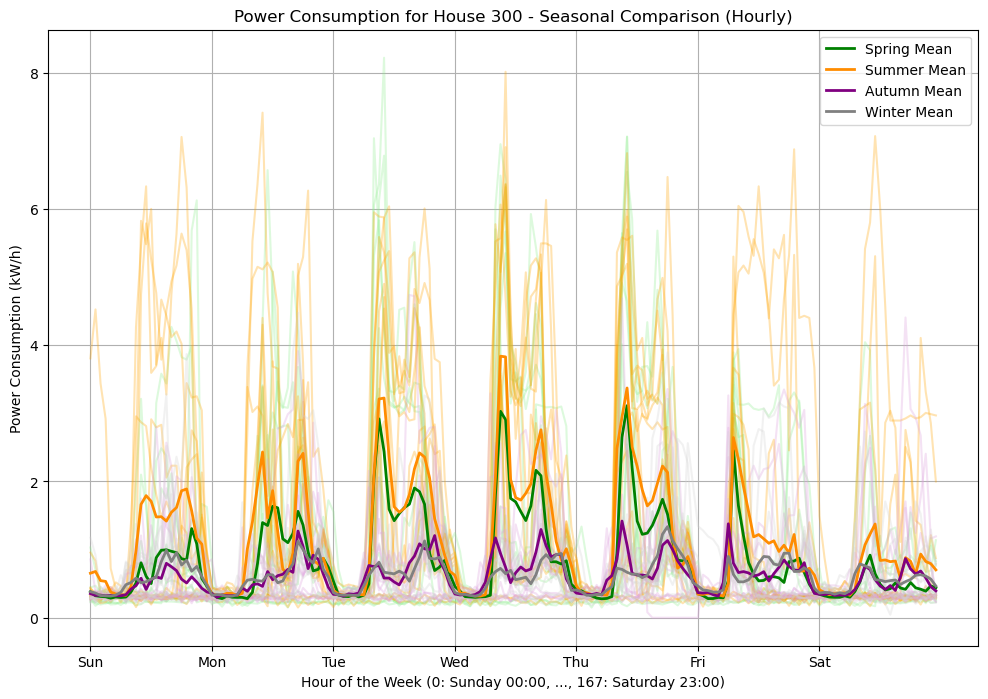

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Read your CSV file, setting low_memory=False to avoid the warning
df = pd.read_csv('Gabriel.csv', low_memory=False)

# Convert DateTime1 to datetime format
df['DateTime1'] = pd.to_datetime(df['DateTime1'])

import pandas as pd
import matplotlib.pyplot as plt

# Select the house 
house_number = 300
consumption_column = df.columns[house_number + 7]

# Filter data for each season
df_spring = df[df['Week'].isin(range(1, 14))]
df_summer = df[df['Week'].isin(range(14, 27))]
df_autumn = df[df['Week'].isin(range(27, 40))]
df_winter = df[df['Week'].isin(range(40, 54))]

# Calculate the mean hourly consumption for each season
df_spring_mean = df_spring.groupby(['Day', df_spring['DateTime1'].dt.hour])[consumption_column].mean().reset_index()
df_summer_mean = df_summer.groupby(['Day', df_summer['DateTime1'].dt.hour])[consumption_column].mean().reset_index()
df_autumn_mean = df_autumn.groupby(['Day', df_autumn['DateTime1'].dt.hour])[consumption_column].mean().reset_index()
df_winter_mean = df_winter.groupby(['Day', df_winter['DateTime1'].dt.hour])[consumption_column].mean().reset_index()

# Prepare data for plotting - All Seasons' Means
for season_df in [df_spring_mean, df_summer_mean, df_autumn_mean, df_winter_mean]:
    season_df['HourOfWeek'] = (season_df['Day'] - 1) * 24 + season_df['DateTime1']

# Plot
plt.figure(figsize=(12, 8))

# Plot individual weeks for each season
seasons_data = [
    (df_spring, 'lightgreen', 'Spring', 'green'),
    (df_summer, 'orange', 'Summer', 'darkorange'),
    (df_autumn, 'plum', 'Autumn', 'purple'),
    (df_winter, 'lightgray', 'Winter', 'gray')
]

for df_season, color_weeks, season_name, color_mean in seasons_data:
    for week_num in df_season['Week'].unique():
        df_week = df_season[df_season['Week'] == week_num].copy()
        df_week.loc[:, 'HourOfWeek'] = (df_week['Day'] - 1) * 24 + df_week['DateTime1'].dt.hour
        plt.plot(df_week['HourOfWeek'], df_week[consumption_column], alpha=0.3, color=color_weeks)
        
for df_season, color_weeks, season_name, color_mean in seasons_data:
    # Plot the season mean
    df_season_mean = df_season.groupby(['Day', df_season['DateTime1'].dt.hour])[consumption_column].mean().reset_index()
    df_season_mean['HourOfWeek'] = (df_season_mean['Day'] - 1) * 24 + df_season_mean['DateTime1']
    plt.plot(df_season_mean['HourOfWeek'], df_season_mean[consumption_column], color=color_mean, linewidth=2, label=f"{season_name} Mean")

plt.xlabel('Hour of the Week (0: Sunday 00:00, ..., 167: Saturday 23:00)')
plt.ylabel('Power Consumption (kW/h)')
plt.title(f'Power Consumption for House {house_number} - Seasonal Comparison (Hourly)')
plt.xticks(range(0, 168, 24), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.grid(True)

# Create legend with only the season means
plt.legend()

plt.show()

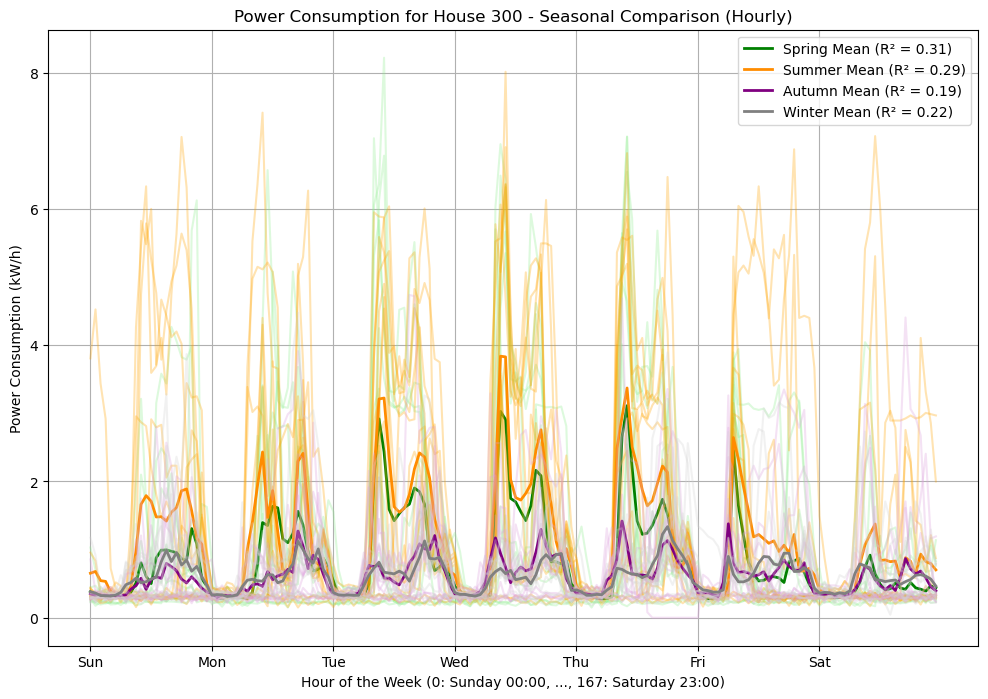

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Read your CSV file, setting low_memory=False to avoid the warning
df = pd.read_csv('Gabriel.csv', low_memory=False)

# Convert DateTime1 to datetime format
df['DateTime1'] = pd.to_datetime(df['DateTime1'])

# Select the house 
house_number = 300
consumption_column = df.columns[house_number + 7]

# Filter data for each season (create copies to avoid SettingWithCopyWarning)
df_spring = df[df['Week'].isin(range(1, 14))].copy()
df_summer = df[df['Week'].isin(range(14, 27))].copy()
df_autumn = df[df['Week'].isin(range(27, 40))].copy()
df_winter = df[df['Week'].isin(range(40, 54))].copy()

# Calculate the mean hourly consumption for each season
df_spring_mean = df_spring.groupby(['Day', df_spring['DateTime1'].dt.hour])[consumption_column].mean().reset_index()
df_summer_mean = df_summer.groupby(['Day', df_summer['DateTime1'].dt.hour])[consumption_column].mean().reset_index()
df_autumn_mean = df_autumn.groupby(['Day', df_autumn['DateTime1'].dt.hour])[consumption_column].mean().reset_index()
df_winter_mean = df_winter.groupby(['Day', df_winter['DateTime1'].dt.hour])[consumption_column].mean().reset_index()

# Prepare data for plotting - All Seasons' Means (including 'HourOfWeek' for each season)
for season_df in [df_spring, df_summer, df_autumn, df_winter]:
    season_df.loc[:, 'HourOfWeek'] = (season_df['Day'] - 1) * 24 + season_df['DateTime1'].dt.hour

for season_df in [df_spring_mean, df_summer_mean, df_autumn_mean, df_winter_mean]:
    season_df['HourOfWeek'] = (season_df['Day'] - 1) * 24 + season_df['DateTime1']

# Plot
plt.figure(figsize=(12, 8))

# Plot individual weeks for each season
seasons_data = [
    (df_spring, 'lightgreen', 'Spring', 'green'),
    (df_summer, 'orange', 'Summer', 'darkorange'),
    (df_autumn, 'plum', 'Autumn', 'purple'),
    (df_winter, 'lightgray', 'Winter', 'gray')
]

for df_season, color_weeks, season_name, color_mean in seasons_data:
    for week_num in df_season['Week'].unique():
        df_week = df_season[df_season['Week'] == week_num].copy()
        df_week.loc[:, 'HourOfWeek'] = (df_week['Day'] - 1) * 24 + df_week['DateTime1'].dt.hour
        plt.plot(df_week['HourOfWeek'], df_week[consumption_column], alpha=0.3, color=color_weeks)

    # Plot the season mean and calculate R-squared for the selected house
    df_season_mean = df_season.groupby(['Day', df_season['DateTime1'].dt.hour])[consumption_column].mean().reset_index()
    df_season_mean['HourOfWeek'] = (df_season_mean['Day'] - 1) * 24 + df_season_mean['DateTime1']

    # Create a mapping from (Day, hour) to 'HourOfWeek'
    hour_of_week_mapping = (df_season_mean['Day'] - 1) * 24 + df_season_mean['DateTime1']
    df_season_mean.set_index(['Day', 'DateTime1'], inplace=True)

    # Get the consumption value for each (Day, hour) combination in the original data for the selected house
    y_pred = df_season.apply(lambda row: df_season_mean.loc[(row['Day'], row['DateTime1'].hour), consumption_column], axis=1)

    # Calculate R-squared
    y_true = df_season[consumption_column].values
    r2 = r2_score(y_true, y_pred)

    plt.plot(df_season_mean['HourOfWeek'], df_season_mean[consumption_column], color=color_mean, linewidth=2, label=f"{season_name} Mean (R² = {r2:.2f})")

plt.xlabel('Hour of the Week (0: Sunday 00:00, ..., 167: Saturday 23:00)')
plt.ylabel('Power Consumption (kW/h)')
plt.title(f'Power Consumption for House {house_number} - Seasonal Comparison (Hourly)')
plt.xticks(range(0, 168, 24), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.grid(True)

# Create legend with only the season means
plt.legend()

plt.show()

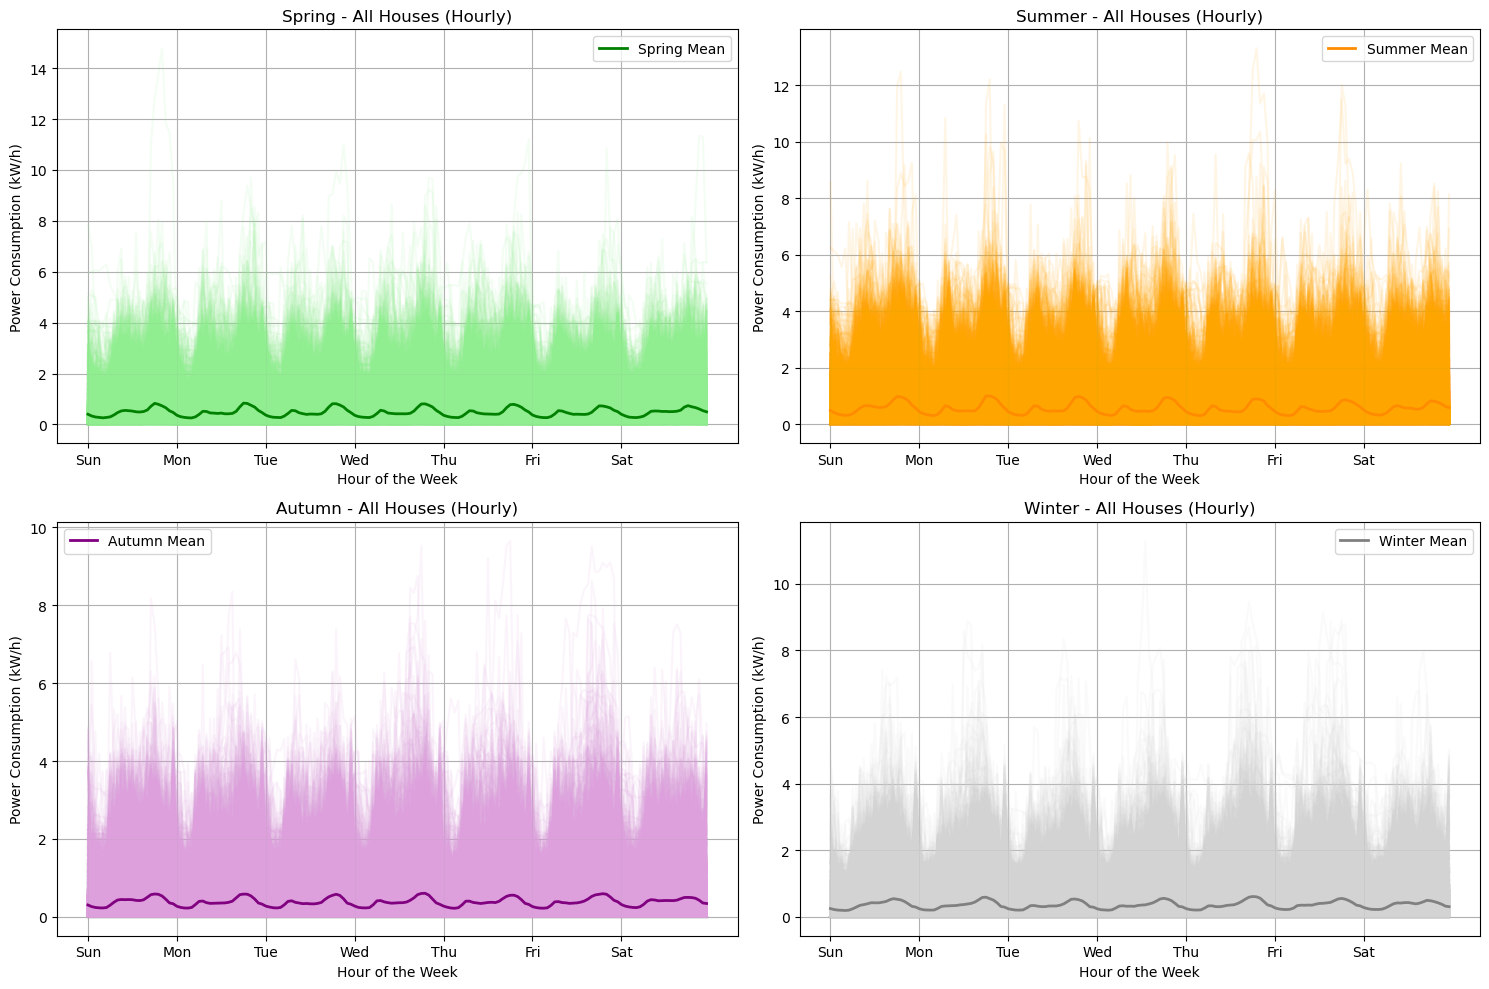

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Read your CSV file, setting low_memory=False to avoid the warning
df = pd.read_csv('Gabriel.csv', low_memory=False)

# Convert DateTime1 to datetime format
df['DateTime1'] = pd.to_datetime(df['DateTime1'])

# Filter data for each season
df_spring = df[df['Week'].isin(range(1, 14))]
df_summer = df[df['Week'].isin(range(14, 27))]
df_autumn = df[df['Week'].isin(range(27, 40))]
df_winter = df[df['Week'].isin(range(40, 54))]

# Get the list of all houses (consumption columns)
consumption_columns = df.columns[7:] 

# Create subplots for each season
fig, axes = plt.subplots(2, 2, figsize=(15, 10)) 

# Data for each season and corresponding subplot
seasons_data = [
    (df_spring, axes[0, 0], 'Spring', 'lightgreen', 'green'),
    (df_summer, axes[0, 1], 'Summer', 'orange', 'darkorange'),
    (df_autumn, axes[1, 0], 'Autumn', 'plum', 'purple'),
    (df_winter, axes[1, 1], 'Winter', 'lightgray', 'gray')
]

# Iterate through each season and plot
for df_season, ax, season_name, color_weeks, color_mean in seasons_data:
    # Calculate the mean hourly consumption for the season across all houses
    df_season_mean = df_season.groupby(['Day', df_season['DateTime1'].dt.hour])[consumption_columns].mean().reset_index()
    df_season_mean['HourOfWeek'] = (df_season_mean['Day'] - 1) * 24 + df_season_mean['DateTime1']

    # Plot individual weeks for each house
    for consumption_column in consumption_columns:
        for week_num in df_season['Week'].unique():
            df_week = df_season[df_season['Week'] == week_num].copy()
            df_week.loc[:, 'HourOfWeek'] = (df_week['Day'] - 1) * 24 + df_week['DateTime1'].dt.hour
            ax.plot(df_week['HourOfWeek'], df_week[consumption_column], alpha=0.1, color=color_weeks)  # Reduced alpha for better visibility with many houses

    # Plot the season mean
    ax.plot(df_season_mean['HourOfWeek'], df_season_mean[consumption_columns].mean(axis=1), color=color_mean, linewidth=2, label=f"{season_name} Mean")

    ax.set_xlabel('Hour of the Week')
    ax.set_ylabel('Power Consumption (kW/h)')
    ax.set_title(f'{season_name} - All Houses (Hourly)')
    ax.set_xticks(range(0, 168, 24))
    ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'

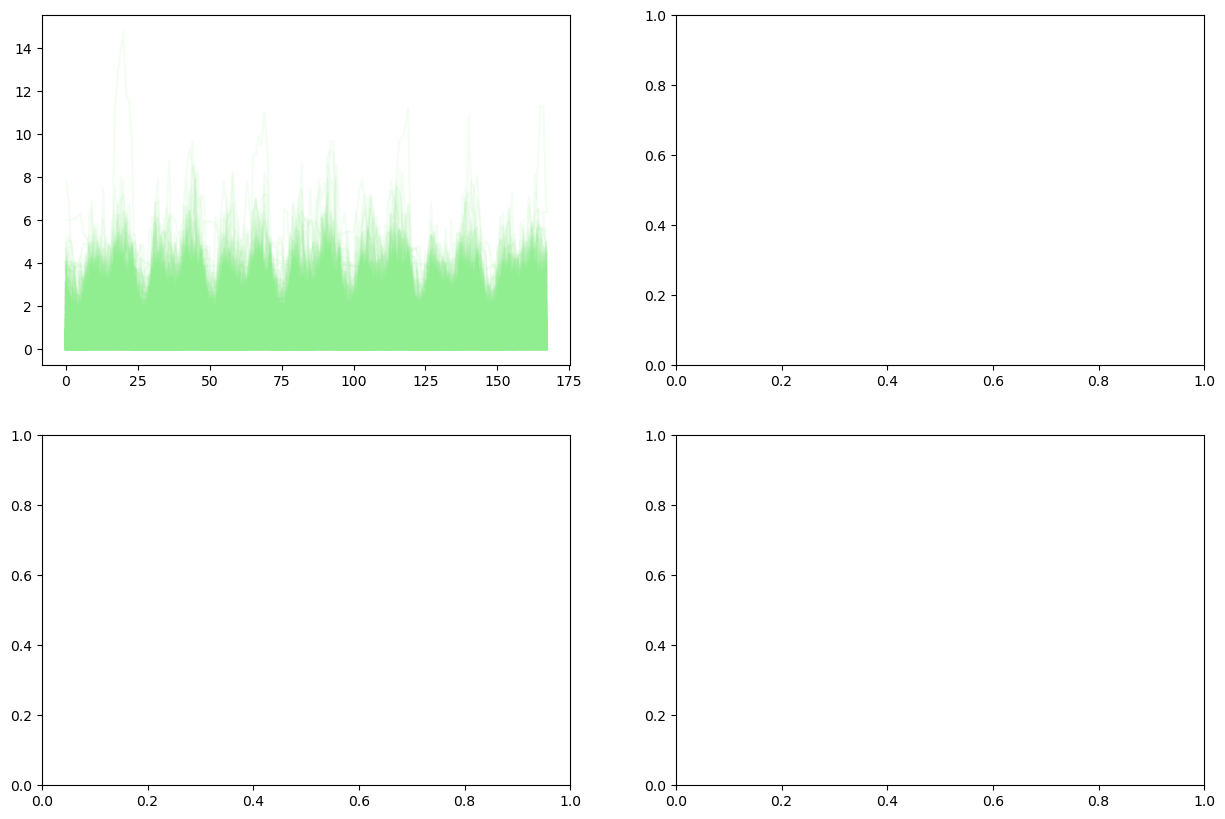

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np 

# Read your CSV file, setting low_memory=False to avoid the warning
df = pd.read_csv('Gabriel.csv', low_memory=False)

# Convert DateTime1 to datetime format
df['DateTime1'] = pd.to_datetime(df['DateTime1'])

# Filter data for each season (create copies to avoid SettingWithCopyWarning)
df_spring = df[df['Week'].isin(range(1, 14))].copy()
df_summer = df[df['Week'].isin(range(14, 27))].copy()
df_autumn = df[df['Week'].isin(range(27, 40))].copy()
df_winter = df[df['Week'].isin(range(40, 54))].copy()

# Get the list of all houses (consumption columns)
consumption_columns = df.columns[7:] 

# Calculate the mean hourly consumption for each season across all houses
df_spring_mean = df_spring.groupby(['Day', df_spring['DateTime1'].dt.hour])[consumption_columns].mean().reset_index()
df_summer_mean = df_summer.groupby(['Day', df_summer['DateTime1'].dt.hour])[consumption_columns].mean().reset_index()
df_autumn_mean = df_autumn.groupby(['Day', df_autumn['DateTime1'].dt.hour])[consumption_columns].mean().reset_index()
df_winter_mean = df_winter.groupby(['Day', df_winter['DateTime1'].dt.hour])[consumption_columns].mean().reset_index()

# Prepare data for plotting - All Seasons' Means (including 'HourOfWeek' for each season)
for season_df in [df_spring, df_summer, df_autumn, df_winter]:
    season_df.loc[:, 'HourOfWeek'] = (season_df['Day'] - 1) * 24 + season_df['DateTime1'].dt.hour

for season_df in [df_spring_mean, df_summer_mean, df_autumn_mean, df_winter_mean]:
    season_df['HourOfWeek'] = (season_df['Day'] - 1) * 24 + season_df['DateTime1']


# Create subplots for each season
fig, axes = plt.subplots(2, 2, figsize=(15, 10)) 

# Data for each season and corresponding subplot
seasons_data = [
    (df_spring, axes[0, 0], 'Spring', 'lightgreen', 'green'),
    (df_summer, axes[0, 1], 'Summer', 'orange', 'darkorange'),
    (df_autumn, axes[1, 0], 'Autumn', 'plum', 'purple'),
    (df_winter, axes[1, 1], 'Winter', 'lightgray', 'gray')
]

# Iterate through each season and plot
for df_season, ax, season_name, color_weeks, color_mean in seasons_data:
    # Plot individual weeks for each house
    for consumption_column in consumption_columns:
        for week_num in df_season['Week'].unique():
            df_week = df_season[df_season['Week'] == week_num].copy()
            df_week.loc[:, 'HourOfWeek'] = (df_week['Day'] - 1) * 24 + df_week['DateTime1'].dt.hour
            ax.plot(df_week['HourOfWeek'], df_week[consumption_column], alpha=0.1, color=color_weeks)

    # Plot the season mean and calculate R-squared
    df_season_mean = df_season.groupby(['Day', df_season['DateTime1'].dt.hour])[consumption_columns].mean().reset_index()
    df_season_mean['HourOfWeek'] = (df_season_mean['Day'] - 1) * 24 + df_season_mean['DateTime1']

    # Create a mapping from (Day, hour) to 'HourOfWeek'
    hour_of_week_mapping = (df_season_mean['Day'] - 1) * 24 + df_season_mean['DateTime1']
    df_season_mean.set_index(['Day', 'DateTime1'], inplace=True)

    # Ensure 'HourOfWeek' is of integer type and handle missing values
    hour_of_week_values = df_season['HourOfWeek'].astype(pd.Int64Dtype())  
    hour_of_week_values = hour_of_week_values.fillna(-1)  

    # Filter out invalid 'HourOfWeek' values
    valid_indices = (hour_of_week_values >= 0) & (hour_of_week_values < 168)

    # Reindex df_season_mean based on valid 'HourOfWeek' values
    df_season_mean_reindexed = df_season_mean.reindex(hour_of_week_mapping[valid_indices] % 168)

    # Get the mean consumption value for each valid 'HourOfWeek'
    y_pred = df_season_mean_reindexed[consumption_columns].mean(axis=1).values

    # Calculate R-squared (excluding NaN values)
    y_true = df_season[consumption_columns].values.flatten()[valid_indices]
    mask = ~np.isnan(y_true) & ~np.isnan(y_pred)
    r2 = r2_score(y_true[mask], y_pred[mask])

    # Plot the season mean
    ax.plot(df_season_mean['HourOfWeek'], df_season_mean[consumption_columns].mean(axis=1), color=color_mean, linewidth=2, label=f"{season_name} Mean (R² = {r2:.2f})")

    ax.set_xlabel('Hour of the Week')
    ax.set_ylabel('Power Consumption (kW/h)')
    ax.set_title(f'{season_name} - All Houses (Hourly)')
    ax.set_xticks(range(0, 168, 24))
    ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()
